# Tutorial on MEEP simulation run with phcr-cavity.py
The tutorial is based on __[documentation example](https://meep.readthedocs.io/en/latest/Python_Tutorials/Resonant_Modes_and_Transmission_in_a_Waveguide_Cavity/)__. 

To run the simulation we have to address the python translator by running system command with <b>!</b> symbol. 

We run simulation code <b>phcr-cavity.py</b>

The console output is saved at <b>Output.txt</b>

In [ ]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt
import math as mt

simfileName ='freq_7.dat'
fileNameNorm_disp = 'dispersion_relations_7.dat'
fileNameNorm_w = 'Omega.dat'

#simfileName_d ='Output-defect-ph-cav-pixel-avg.txt'
#fileNameNorm_d = 'flux-defect-cavity-Q-factor-pixelAvg.dat'

ex_str_n =f'grep freqs: {simfileName}  | cut -d , -f3,7-| sed 1d> {fileNameNorm_disp}'
ex_str_w =f'grep freqs: {simfileName}  | cut -d , -f7-| sed 1d> {fileNameNorm_w}'

call(ex_str_n, shell="True")
call(ex_str_w, shell="True")


# ------------------------------------------------------------------------------------------------------------------------------------


a0 = 1e-6          # default lattice constant defined in MPB
# wl = 0.880       # wavelength of light (in micrometer) for 4_F_3/2 - 4_I_9/2 transition
wl = 0.880e-6       # wavelength of light (in micrometer) for 4_F_3/2 - 4_I_9/2 transition
a = 0.352*wl     # nonperturbed lattice constant of the PC (in micrometer)
wB = 0.852*wl
theta = 60        # nanobeam interior angle
H = wB/2*mt.tan(mt.radians(theta)) # high of the 1D PC's beam
c = 3e8           
g = 2*np.pi/a
# g = 1


# ------------------------------------------------------------------------------------------------------------------------------------


kx = np.genfromtxt(fileNameNorm_disp, delimiter=",",filling_values=0,usecols = (0))

k_x = kx*g

frequency_4 = [ (0, 1.14179, 1.17264, 1.21532, 1.30854, 1.61657, 1.65774, 1.75783),
 (0.123835, 1.14849, 1.17771, 1.22041, 1.31293, 1.62245, 1.66137, 1.7619),
 (0.246535, 1.1682, 1.19284, 1.23696, 1.32577, 1.6349, 1.67327, 1.77392),
 (0.369787, 1.20077, 1.21724, 1.26453, 1.34693, 1.6557, 1.69334, 1.79315),
 (0.491351, 1.24464, 1.25004, 1.30208, 1.37552, 1.68335, 1.72029, 1.81946),
 (0.613608, 1.29012, 1.29926, 1.34793, 1.41113, 1.71128, 1.75167, 1.84844),
 (0.72925, 1.33608, 1.36109, 1.40328, 1.45184, 1.74521, 1.78731, 1.84996),
 (0.845718, 1.38062, 1.43018, 1.46712, 1.49828, 1.74495, 1.77506, 1.83667),
 (0.954661, 1.42766, 1.50405, 1.53675, 1.55114, 1.65361, 1.80459, 1.87722),
 (1.05756, 1.46489, 1.56055, 1.57296, 1.61476, 1.62168, 1.79303, 1.90927),
 (1.14492, 1.46109, 1.51949, 1.62757, 1.69038, 1.70171, 1.7702, 1.8807),
 (1.1861, 1.42936, 1.52569, 1.65857, 1.72153, 1.77381, 1.78759, 1.80357)]

# omega = [[i*g*c for i in j] for j in omega]

frequency_6 = [ (0, 0.872811, 0.907627, 0.93216, 0.950728, 1.26531, 1.29429, 1.32007),
 (0.133149, 0.880224, 0.917414, 0.942763, 0.958726, 1.27414, 1.30079, 1.32656),
 (0.26521, 0.90274, 0.946239, 0.97354, 0.985032, 1.29575, 1.32159, 1.34801),
 (0.395972, 0.939446, 0.992249, 1.02239, 1.02777, 1.32984, 1.35577, 1.38263),
 (0.524257, 0.989552, 1.05256, 1.08388, 1.08655, 1.37552, 1.4019, 1.42959),
 (0.648702, 1.05193, 1.12377, 1.15107, 1.16331, 1.4318, 1.45814, 1.48783),
 (0.767431, 1.12545, 1.20157, 1.22822, 1.25039, 1.49734, 1.52222, 1.55634),
 (0.877944, 1.20901, 1.28083, 1.31546, 1.34632, 1.56987, 1.59067, 1.63449),
 (0.977045, 1.30224, 1.35878, 1.41233, 1.44814, 1.63645, 1.64645, 1.72069),
 (1.06052, 1.39791, 1.43436, 1.52107, 1.54317, 1.62183, 1.71918, 1.76777),
 (1.12137, 1.47292, 1.49751, 1.58396, 1.62172, 1.67621, 1.74058, 1.78694),
 (1.14509, 1.48509, 1.52271, 1.65414, 1.67725, 1.69883, 1.7237, 1.79852)]

frequency_7 = [ (0, 0.198732, 0.199337, 0.199969, 0.199998, 0.281769, 0.282466, 0.282767),
 (0.146318, 0.246629, 0.246966, 0.247979, 0.248082, 0.317109, 0.317625, 0.318663),
 (0.29258, 0.352269, 0.354174, 0.354959, 0.355171, 0.405314, 0.405912, 0.40763),
 (0.438714, 0.478952, 0.482453, 0.483264, 0.483529, 0.520024, 0.521221, 0.523218),
 (0.584589, 0.61362, 0.618779, 0.619803, 0.620093, 0.647493, 0.649119, 0.651448),
 (0.729946, 0.751957, 0.758767, 0.760145, 0.760457, 0.78164, 0.783399, 0.786167),
 (0.87427, 0.892535, 0.900615, 0.902514, 0.902849, 0.919666, 0.92123, 0.924542),
 (1.01682, 1.03507, 1.0434, 1.04608, 1.04644, 1.06013, 1.06119, 1.06515),
 (1.15715, 1.17929, 1.18645, 1.1904, 1.1908, 1.20221, 1.20251, 1.2072),
 (1.29505, 1.32459, 1.32896, 1.33524, 1.33568, 1.34473, 1.34538, 1.35025),
 (1.42967, 1.4684, 1.47042, 1.48046, 1.48092, 1.48754, 1.48928, 1.49404),
 (1.55013, 1.57034, 1.61649, 1.62694, 1.62736, 1.63034, 1.63387, 1.64066)]

w_4 = np.asarray(frequency_4)

f_4 = a*w_4/a0

frequency_4 = f_4*g*c/(2*np.pi*1e12) # frequency in THz

w_6 = np.asarray(frequency_6)

f_6 = a*w_6/a0

frequency_6 = f_6*g*c/(2*np.pi*1e12) # frequency in THz

w_7 = np.asarray(frequency_7)

f_7 = a*w_7/a0

frequency_7 = f_7*g*c/(2*np.pi*1e12) # frequency in THz

# print("kx=",k_x)
#print("omega=",omega)
N = 500

k = np.linspace(0.01,0.5*g,N)
omega_light_line = c*k/(2*np.pi*1e12) # frequency in THz


# ------------------------------------------------------------------------------------------------------------------------------------


fig = plt.figure()
ax = fig.add_subplot()

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

for x, y in zip(k_x, frequency_4):
    ax.scatter([x] * len(y), y, s=30, facecolors='none', edgecolors=colors)

plt.grid(linestyle='--', linewidth=2)
ax.plot(k, omega_light_line, color = 'green', linewidth = 3, linestyle = '--', label='Light line, $sc_y$ = wB, $sc_z$ = H')
# plt.xticks(ticks=[0,0.1,0.2,0.3,0.4,0.5])
plt.xlabel("Wave vector, $k_x$, rad/m", size=16)
plt.ylabel("Frequency, $v$, THz", size=16)
plt.legend()
plt.show()

print('a(micrometer)=', a, 'wB(micrometer)=', wB, 'H(micrometer)=', H)


fig = plt.figure()
ax = fig.add_subplot()

for x, y in zip(k_x, frequency_6):
    ax.scatter([x] * len(y), y, s=30, facecolors='none', edgecolors=colors)

plt.grid(linestyle='--', linewidth=2)
ax.plot(k, omega_light_line, color = 'green', linewidth = 3, linestyle = '--', label='Light line, $sc_y$ = 1, $sc_z$ = 1')
# plt.xticks(ticks=[0,0.1,0.2,0.3,0.4,0.5])
plt.xlabel("Wave vector, $k_x$, rad/m", size=16)
plt.ylabel("Frequency, $v$, THz", size=16)
plt.legend()
plt.show()


fig = plt.figure()
ax = fig.add_subplot()

for x, y in zip(k_x, frequency_7):
    ax.scatter([x] * len(y), y, s=30, facecolors='none', edgecolors=colors)

plt.grid(linestyle='--', linewidth=2)
ax.plot(k, omega_light_line, color = 'green', linewidth = 3, linestyle = '--', label='Light line, $sc_y$ = 5, $sc_z$ = 5')
# plt.xticks(ticks=[0,0.1,0.2,0.3,0.4,0.5])
plt.xlabel("Wave vector, $k_x$, rad/m", size=16)
plt.ylabel("Frequency, $v$, THz", size=16)
plt.legend()
plt.show()


# ax.set_yscale('log')
# ax.plot(dist,SKwithDSB,color=black_1,label='No dispersion compensation')
# ax.plot(dist,SKwithDSBDC,color=red_1,label='With dispersion compensation')
# ax.plot(dist,SKwithDSBHalf,color=green_1,label='Only right sidebands are detected')
# plt.yticks(ticks=[1,10,100,1000])
# ax.set_ylim(bottom=0.1)
# plt.legend()
# plt.tight_layout()
# plt.savefig("Plots/Referee-reply-Fig.pdf")

# print(g)

In [91]:
x=440*10**12-330*10**12

3*10**8/(330*10**12 + x/2)

7.792207792207792e-07

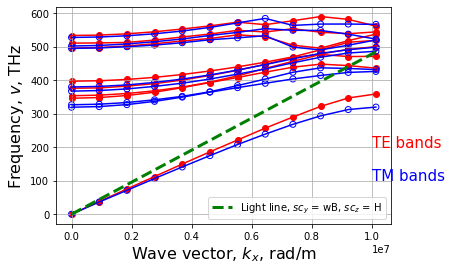

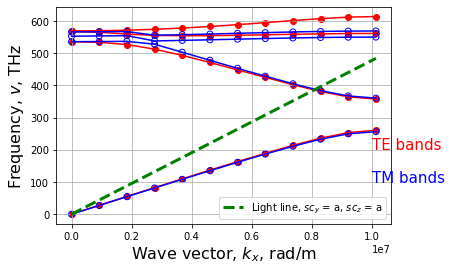

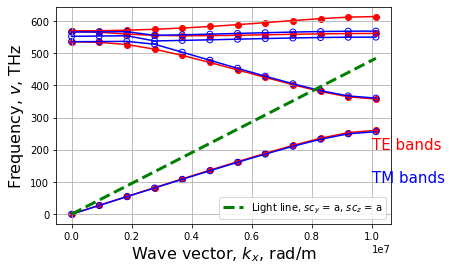

lambda1(m)= 1.1512302045966318e-06 lambda2(m)= 8.388417273428847e-07
v1(THz)= 260.59080000000006 v2(THz)= 357.6360000000001
lambda_0(m)= 9.950359659697582e-07


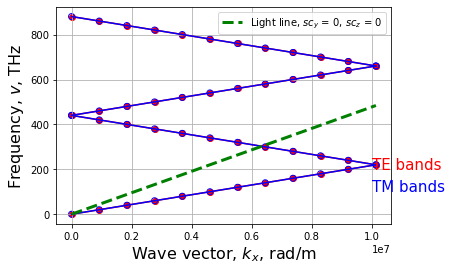

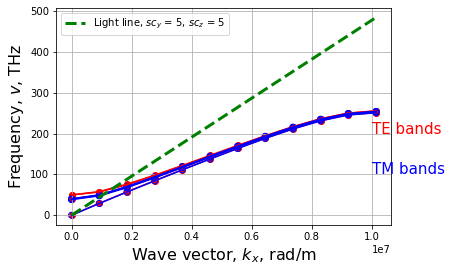

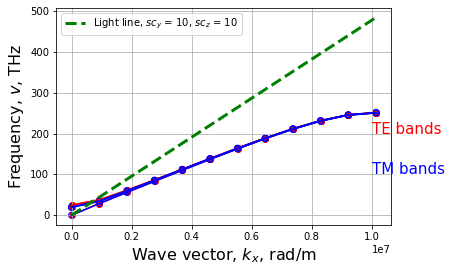

In [153]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt
import math as mt

# simfileName_te ='te_freqs_15.dat'
# fileNameNorm_disp_te = 'dispersion_relations_te_15.dat'
# fileNameNorm_w_te = 'Omega_te.dat'

# simfileName_tm ='tm_freqs_15.dat'
# fileNameNorm_disp_tm = 'dispersion_relations_tm_15.dat'
# fileNameNorm_w_tm = 'Omega_tm.dat'

# ex_str_n =f'grep freqs: {simfileName_te}  | cut -d , -f3,7-| sed 1d> {fileNameNorm_disp_te}'
# ex_str_w =f'grep freqs: {simfileName_te}  | cut -d , -f7-| sed 1d> {fileNameNorm_w_te}'

# call(ex_str_n, shell="True")
# call(ex_str_w, shell="True")

# ex_str_n =f'grep freqs: {simfileName_tm}  | cut -d , -f3,7-| sed 1d> {fileNameNorm_disp_tm}'
# ex_str_w =f'grep freqs: {simfileName_tm}  | cut -d , -f7-| sed 1d> {fileNameNorm_w_tm}'

# call(ex_str_n, shell="True")
# call(ex_str_w, shell="True")


# ------------------------------------------------------------------------------------------------------------------------------------


a0 = 1e-6          # default lattice constant defined in MPB
# wl = 0.880       # wavelength of light (in micrometer) for 4_F_3/2 - 4_I_9/2 transition
wl = 0.880e-6       # wavelength of light (in micrometer) for 4_F_3/2 - 4_I_9/2 transition
a = 0.352*wl     # nonperturbed lattice constant of the PC (in micrometer)
wB = 0.852*wl
theta = 60        # nanobeam interior angle
H = wB/2*mt.tan(mt.radians(theta)) # high of the 1D PC's beam
c = 3e8           
g = 2*np.pi/a


# ------------------------------------------------------------------------------------------------------------------------------------



# kx = np.genfromtxt(fileNameNorm_disp_te, delimiter=",",filling_values=0,usecols = (0))

kx = [0, 0.0454545, 0.0909091, 0.136364, 0.181818, 0.227273, 0.272727, 0.318182, 0.363636, 0.409091, 0.454545, 0.5]
kx = np.asarray(kx)
k_x = kx*g

te_freqs8 = [ (0, 1.15297, 1.17813, 1.2526, 1.32257, 1.65104, 1.70095, 1.77686),
 (0.126127, 1.15996, 1.18371, 1.25574, 1.32695, 1.65716, 1.70308, 1.781),
 (0.251149, 1.18019, 1.20021, 1.27362, 1.33986, 1.67295, 1.70795, 1.79366),
 (0.3747, 1.21323, 1.22698, 1.29824, 1.36067, 1.69482, 1.73154, 1.8139),
 (0.498529, 1.25841, 1.26349, 1.33381, 1.38901, 1.72274, 1.76194, 1.84132),
 (0.620111, 1.30922, 1.31304, 1.3798, 1.42401, 1.74711, 1.79146, 1.87236),
 (0.737831, 1.35919, 1.37566, 1.43103, 1.46475, 1.78361, 1.8283, 1.90937),
 (0.855788, 1.41247, 1.44906, 1.49046, 1.51174, 1.76563, 1.81207, 1.88453),
 (0.965896, 1.46176, 1.52025, 1.55679, 1.56452, 1.68, 1.84419, 1.92346),
 (1.07198, 1.49229, 1.58844, 1.59256, 1.6341, 1.65078, 1.80948, 1.96542),
 (1.15557, 1.47786, 1.56781, 1.63907, 1.70923, 1.7255, 1.79477, 1.93698),
 (1.1956, 1.45182, 1.56948, 1.6661, 1.72868, 1.79117, 1.81279, 1.87051)]

tm_freqs8 = [ (0, 1.06372, 1.08793, 1.22367, 1.26506, 1.64854, 1.67244, 1.75752),
 (0.121393, 1.07025, 1.09375, 1.22953, 1.27057, 1.65337, 1.67774, 1.76202),
 (0.237185, 1.0898, 1.11042, 1.24581, 1.28543, 1.66547, 1.69292, 1.77423),
 (0.355119, 1.12197, 1.13737, 1.27095, 1.31008, 1.68152, 1.71502, 1.79394),
 (0.46986, 1.16419, 1.17188, 1.30263, 1.34366, 1.70512, 1.74232, 1.82131),
 (0.582815, 1.21319, 1.21741, 1.34393, 1.38464, 1.73456, 1.77701, 1.85733),
 (0.692869, 1.25856, 1.2792, 1.39281, 1.43301, 1.75366, 1.80802, 1.90246),
 (0.796321, 1.30185, 1.34362, 1.4443, 1.48784, 1.77482, 1.84548, 1.94676),
 (0.89365, 1.34475, 1.41138, 1.50569, 1.54488, 1.66148, 1.82865, 1.87726),
 (0.977751, 1.37949, 1.45535, 1.56094, 1.59975, 1.63357, 1.82708, 1.8906),
 (1.04073, 1.40987, 1.44965, 1.60304, 1.63568, 1.68025, 1.79058, 1.89087),
 (1.06519, 1.41968, 1.43777, 1.62015, 1.66093, 1.73235, 1.74071, 1.88769)]

te_w = np.asarray(te_freqs8)

te_freqs = a*te_w/a0

TE_freqs = te_freqs*g*c/(2*np.pi*1e12) # frequency in THz

tm_w = np.asarray(tm_freqs8)

tm_freqs = a*tm_w/a0

TM_freqs = tm_freqs*g*c/(2*np.pi*1e12) # frequency in THz

N = 500
k = np.linspace(0.01,0.5*g,N)
omega_light_line = c*k/(2*np.pi*1e12) # frequency in THz


# ------------------------------------------------------------------------------------------------------------------------------------


fig, ax = plt.subplots()
# x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for x, y_te, y_tm in zip(k_x, TE_freqs, TM_freqs):
    ax.scatter([x]*len(y_te), y_te, color='red')
    ax.scatter([x]*len(y_tm), y_tm, color='blue', facecolors='none')
ax.plot(k_x, TE_freqs, color='red')
ax.plot(k_x, TM_freqs, color='blue')
ax.plot(k, omega_light_line, color = 'green', linewidth = 3, linestyle = '--', label='Light line, $sc_y$ = wB, $sc_z$ = H')
# ax.set_ylim([0, 1])
# ax.set_xlim([x[0], x[-1]])

# Plot gaps
# for gap in tm_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

# for gap in te_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(1e7, 100, 'TM bands', color='blue', size=15)
ax.text(1e7, 200, 'TE bands', color='red', size=15)

# points_in_between = (len(tm_freqs) - 4) / 3
# tick_locs = [i*points_in_between+i for i in range(4)]
# tick_labs = ['Γ', 'X', 'M', 'Γ']
# ax.set_xticks(tick_locs)
# ax.set_xticklabels(tick_labs, size=16)
plt.xlabel("Wave vector, $k_x$, rad/m", size=16)
plt.ylabel("Frequency, $v$, THz", size=16)
ax.grid(True)
plt.legend()
plt.show()


# ------------------------------------------------------------------------------------------------------------------------------------


te_freqs9 = [ (0, 1.78579, 1.89213, 1.89834),
 (0.0919915, 1.77969, 1.88425, 1.89991),
 (0.183777, 1.75658, 1.86523, 1.90549),
 (0.27526, 1.70921, 1.85172, 1.91483),
 (0.366093, 1.64429, 1.84781, 1.92769),
 (0.455986, 1.57112, 1.84907, 1.94376),
 (0.544441, 1.49452, 1.85277, 1.96256),
 (0.630578, 1.41708, 1.85778, 1.98343),
 (0.71283, 1.34111, 1.86301, 2.00504),
 (0.787332, 1.27095, 1.86755, 2.02533),
 (0.845422, 1.21532, 1.87069, 2.04078),
 (0.869231, 1.19233, 1.8718, 2.0468)]

tm_freqs9 = [ (0, 1.78675, 1.84287, 1.88752),
 (0.0907707, 1.78772, 1.84585, 1.8886),
 (0.181375, 1.79021, 1.8487, 1.89152),
 (0.271622, 1.76004, 1.79428, 1.85328),
 (0.361258, 1.67745, 1.79964, 1.85911),
 (0.450187, 1.59402, 1.80592, 1.86561),
 (0.537691, 1.5106, 1.81268, 1.873),
 (0.622494, 1.42931, 1.81916, 1.88047),
 (0.703365, 1.35087, 1.82513, 1.88718),
 (0.776298, 1.27972, 1.82989, 1.89262),
 (0.832421, 1.22466, 1.83294, 1.89616),
 (0.855087, 1.20234, 1.834, 1.89739)]

te_w = np.asarray(te_freqs9)

te_freqs = a*te_w/a0

TE_freqs = te_freqs*g*c/(2*np.pi*1e12) # frequency in THz

tm_w = np.asarray(tm_freqs9)

tm_freqs = a*tm_w/a0

TM_freqs = tm_freqs*g*c/(2*np.pi*1e12) # frequency in THz


# ------------------------------------------------------------------------------------------------------------------------------------


fig, ax = plt.subplots()
# x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for x, y_te, y_tm in zip(k_x, TE_freqs, TM_freqs):
    ax.scatter([x]*len(y_te), y_te, color='red')
    ax.scatter([x]*len(y_tm), y_tm, color='blue', facecolors='none')
ax.plot(k_x, TE_freqs, color='red')
ax.plot(k_x, TM_freqs, color='blue')
ax.plot(k, omega_light_line, color = 'green', linewidth = 3, linestyle = '--', label='Light line, $sc_y$ = a, $sc_z$ = a')
# ax.set_ylim([0, 1])
# ax.set_xlim([x[0], x[-1]])

# Plot gaps
# for gap in tm_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

# for gap in te_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(1e7, 100, 'TM bands', color='blue', size=15)
ax.text(1e7, 200, 'TE bands', color='red', size=15)

# points_in_between = (len(tm_freqs) - 4) / 3
# tick_locs = [i*points_in_between+i for i in range(4)]
# tick_labs = ['Γ', 'X', 'M', 'Γ']
# ax.set_xticks(tick_locs)
# ax.set_xticklabels(tick_labs, size=16)
plt.xlabel("Wave vector, $k_x$, rad/m", size=16)
plt.ylabel("Frequency, $v$, THz", size=16)
ax.grid(True)
plt.legend()
plt.show()


# ------------------------------------------------------------------------------------------------------------------------------------


te_freqs10 = [ (0, 1.78551, 1.89205, 1.89812),
 (0.0919543, 1.77943, 1.88398, 1.89969),
 (0.183676, 1.75631, 1.86489, 1.90525),
 (0.275106, 1.70889, 1.85136, 1.91459),
 (0.365889, 1.64392, 1.84746, 1.92745),
 (0.455725, 1.57074, 1.84873, 1.9435),
 (0.544104, 1.49418, 1.85242, 1.96228),
 (0.630238, 1.41668, 1.85746, 1.98313),
 (0.712394, 1.34079, 1.8627, 2.00473),
 (0.786819, 1.27064, 1.86725, 2.02501),
 (0.844865, 1.21508, 1.87038, 2.04042),
 (0.868636, 1.19212, 1.87149, 2.04643)]

tm_freqs10 = [ (0, 1.78631, 1.8415, 1.8862),
 (0.0907196, 1.78726, 1.84455, 1.8872),
 (0.181354, 1.78982, 1.84731, 1.8899),
 (0.271486, 1.75984, 1.79389, 1.85178),
 (0.36114, 1.67732, 1.79926, 1.85744),
 (0.449935, 1.59386, 1.80548, 1.8642),
 (0.537489, 1.51049, 1.81219, 1.87157),
 (0.622302, 1.42894, 1.81874, 1.87896),
 (0.703156, 1.35058, 1.82471, 1.8857),
 (0.775978, 1.27954, 1.82942, 1.89111),
 (0.832104, 1.22447, 1.83249, 1.89465),
 (0.854734, 1.20219, 1.83355, 1.89587)]

te_w = np.asarray(te_freqs10)

te_freqs = a*te_w/a0

TE_freqs = te_freqs*g*c/(2*np.pi*1e12) # frequency in THz

tm_w = np.asarray(tm_freqs10)

tm_freqs = a*tm_w/a0

TM_freqs = tm_freqs*g*c/(2*np.pi*1e12) # frequency in THz


# ------------------------------------------------------------------------------------------------------------------------------------


fig, ax = plt.subplots()
# x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for x, y_te, y_tm in zip(k_x, TE_freqs, TM_freqs):
    ax.scatter([x]*len(y_te), y_te, color='red')
    ax.scatter([x]*len(y_tm), y_tm, color='blue', facecolors='none')
ax.plot(k_x, TE_freqs, color='red')
ax.plot(k_x, TM_freqs, color='blue')
ax.plot(k, omega_light_line, color = 'green', linewidth = 3, linestyle = '--', label='Light line, $sc_y$ = a, $sc_z$ = a')
# ax.set_ylim([0, 1])
# ax.set_xlim([x[0], x[-1]])

# Plot gaps
# for gap in tm_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

# for gap in te_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(1e7, 100, 'TM bands', color='blue', size=15)
ax.text(1e7, 200, 'TE bands', color='red', size=15)

# points_in_between = (len(tm_freqs) - 4) / 3
# tick_locs = [i*points_in_between+i for i in range(4)]
# tick_labs = ['Γ', 'X', 'M', 'Γ']
# ax.set_xticks(tick_locs)
# ax.set_xticklabels(tick_labs, size=16)
plt.xlabel("Wave vector, $k_x$, rad/m", size=16)
plt.ylabel("Frequency, $v$, THz", size=16)
ax.grid(True)
plt.legend()
plt.show()

w1=a*0.868636*g*c/a0 
w2=a*1.19212*g*c/a0
lambda1 = 2*np.pi*c/w1
lambda2 = 2*np.pi*c/w2
v1=w1/(2*np.pi*1e12) 
v2=w2/(2*np.pi*1e12)

print("lambda1(m)=",lambda1, "lambda2(m)=",lambda2)
print("v1(THz)=",v1, "v2(THz)=",v2)
print("lambda_0(m)=",lambda2 + (lambda1-lambda2)/2)


# ------------------------------------------------------------------------------------------------------------------------------------


te_freqs11 = [ (0, 1.46741, 1.46741, 2.93482),
 (0.0667005, 1.40071, 1.53411, 2.86812),
 (0.133401, 1.33401, 1.60081, 2.80142),
 (0.200102, 1.26731, 1.66751, 2.73472),
 (0.266802, 1.20061, 1.73421, 2.66802),
 (0.333503, 1.13391, 1.80091, 2.60132),
 (0.400203, 1.06721, 1.86761, 2.53462),
 (0.466904, 1.00051, 1.93432, 2.46792),
 (0.533604, 0.933807, 2.00102, 2.40122),
 (0.600305, 0.867107, 2.06772, 2.33452),
 (0.667005, 0.800406, 2.13442, 2.26782),
 (0.733706, 0.733706, 2.20112, 2.20112)]

tm_freqs11 = [ (0, 1.46741, 1.46741, 2.93482),
 (0.0667005, 1.40071, 1.53411, 2.86812),
 (0.133401, 1.33401, 1.60081, 2.80142),
 (0.200102, 1.26731, 1.66751, 2.73472),
 (0.266802, 1.20061, 1.73421, 2.66802),
 (0.333503, 1.13391, 1.80091, 2.60132),
 (0.400203, 1.06721, 1.86761, 2.53462),
 (0.466904, 1.00051, 1.93432, 2.46792),
 (0.533604, 0.933807, 2.00102, 2.40122),
 (0.600305, 0.867107, 2.06772, 2.33452),
 (0.667005, 0.800406, 2.13442, 2.26782),
 (0.733706, 0.733706, 2.20112, 2.20112)]

te_w = np.asarray(te_freqs11)

# tm_w11 = np.asarray(tm_freqs11)

# tm_w12 = np.asarray(tm_freqs12)

# print(tm_w11/tm_w12)

te_freqs = a*te_w/a0

TE_freqs = te_freqs*g*c/(2*np.pi*1e12) # frequency in THz

tm_w = np.asarray(tm_freqs11)

tm_freqs = a*tm_w/a0

TM_freqs = tm_freqs*g*c/(2*np.pi*1e12) # frequency in THz
# print( (1 - 1.89812/1.89834)*100 )

# ------------------------------------------------------------------------------------------------------------------------------------


fig, ax = plt.subplots()
# x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for x, y_te, y_tm in zip(k_x, TE_freqs, TM_freqs):
    ax.scatter([x]*len(y_te), y_te, color='red')
    ax.scatter([x]*len(y_tm), y_tm, color='blue', facecolors='none')
ax.plot(k_x, TE_freqs, color='red')
ax.plot(k_x, TM_freqs, color='blue')
ax.plot(k, omega_light_line, color = 'green', linewidth = 3, linestyle = '--', label='Light line, $sc_y$ = 0, $sc_z$ = 0')
# ax.set_ylim([0, 1])
# ax.set_xlim([x[0], x[-1]])

# Plot gaps
# for gap in tm_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

# for gap in te_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(1e7, 100, 'TM bands', color='blue', size=15)
ax.text(1e7, 200, 'TE bands', color='red', size=15)

# points_in_between = (len(tm_freqs) - 4) / 3
# tick_locs = [i*points_in_between+i for i in range(4)]
# tick_labs = ['Γ', 'X', 'M', 'Γ']
# ax.set_xticks(tick_locs)
# ax.set_xticklabels(tick_labs, size=16)
plt.xlabel("Wave vector, $k_x$, rad/m", size=16)
plt.ylabel("Frequency, $v$, THz", size=16)
ax.grid(True)
plt.legend()
plt.show()


# ------------------------------------------------------------------------------------------------------------------------------------


te_freqs13 = [ (0, 0.13318, 0.165257, 0.165723),
 (0.0968938, 0.164012, 0.189875, 0.192656),
 (0.190865, 0.23051, 0.248736, 0.253533),
 (0.281685, 0.308972, 0.322522, 0.326558),
 (0.371645, 0.391937, 0.40256, 0.405955),
 (0.459658, 0.476003, 0.484765, 0.487806),
 (0.546028, 0.559398, 0.566935, 0.569433),
 (0.628506, 0.639799, 0.646849, 0.648724),
 (0.70549, 0.715096, 0.721612, 0.723113),
 (0.771988, 0.780119, 0.786423, 0.787633),
 (0.819872, 0.826866, 0.833177, 0.834268),
 (0.83798, 0.84452, 0.850785, 0.851875)]

tm_freqs13 = [ (0, 0.127505, 0.131103, 0.134709),
 (0.0958423, 0.157874, 0.162019, 0.165964),
 (0.189073, 0.22517, 0.229811, 0.234154),
 (0.280183, 0.304919, 0.309452, 0.31336),
 (0.369842, 0.388611, 0.392738, 0.396327),
 (0.458206, 0.473391, 0.47736, 0.481342),
 (0.544282, 0.556773, 0.560363, 0.56369),
 (0.627128, 0.637657, 0.641169, 0.644563),
 (0.703934, 0.712762, 0.716047, 0.719535),
 (0.770521, 0.777922, 0.78113, 0.783771),
 (0.818365, 0.824758, 0.827853, 0.830044),
 (0.836427, 0.842406, 0.845448, 0.847451)]

te_w = np.asarray(te_freqs13)

# tm_w11 = np.asarray(tm_freqs11)

# tm_w12 = np.asarray(tm_freqs12)

# print(tm_w11/tm_w12)

te_freqs = a*te_w/a0

TE_freqs = te_freqs*g*c/(2*np.pi*1e12) # frequency in THz

tm_w = np.asarray(tm_freqs13)

tm_freqs = a*tm_w/a0

TM_freqs = tm_freqs*g*c/(2*np.pi*1e12) # frequency in THz
# print( (1 - 1.89812/1.89834)*100 )


# ------------------------------------------------------------------------------------------------------------------------------------


fig, ax = plt.subplots()
# x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for x, y_te, y_tm in zip(k_x, TE_freqs, TM_freqs):
    ax.scatter([x]*len(y_te), y_te, color='red')
    ax.scatter([x]*len(y_tm), y_tm, color='blue', facecolors='none')
ax.plot(k_x, TE_freqs, color='red')
ax.plot(k_x, TM_freqs, color='blue')
ax.plot(k, omega_light_line, color = 'green', linewidth = 3, linestyle = '--', label='Light line, $sc_y$ = 5, $sc_z$ = 5')
# ax.set_ylim([0, 1])
# ax.set_xlim([x[0], x[-1]])

# Plot gaps
# for gap in tm_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

# for gap in te_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(1e7, 100, 'TM bands', color='blue', size=15)
ax.text(1e7, 200, 'TE bands', color='red', size=15)

# points_in_between = (len(tm_freqs) - 4) / 3
# tick_locs = [i*points_in_between+i for i in range(4)]
# tick_labs = ['Γ', 'X', 'M', 'Γ']
# ax.set_xticks(tick_locs)
# ax.set_xticklabels(tick_labs, size=16)
plt.xlabel("Wave vector, $k_x$, rad/m", size=16)
plt.ylabel("Frequency, $v$, THz", size=16)
ax.grid(True)
plt.legend()
plt.show()


# ------------------------------------------------------------------------------------------------------------------------------------


te_freqs15 = [ (0, 0.066738, 0.0827085, 0.0829439),
 (0.0955448, 0.115919, 0.124485, 0.126692),
 (0.186809, 0.197231, 0.202341, 0.204496),
 (0.277272, 0.284259, 0.287732, 0.289458),
 (0.367083, 0.37228, 0.374885, 0.376319),
 (0.455661, 0.459832, 0.461925, 0.463171),
 (0.542123, 0.545508, 0.547391, 0.548356),
 (0.625177, 0.627992, 0.629647, 0.630469),
 (0.702328, 0.704705, 0.706298, 0.70692),
 (0.769077, 0.771064, 0.772669, 0.773114),
 (0.817186, 0.81888, 0.820514, 0.820859),
 (0.835343, 0.83691, 0.838534, 0.838874)]

tm_freqs15 = [ (0, 0.0638153, 0.0656, 0.0674655),
 (0.0946908, 0.112824, 0.115101, 0.117309),
 (0.186081, 0.19566, 0.197714, 0.199718),
 (0.276641, 0.283186, 0.284829, 0.286494),
 (0.36653, 0.371462, 0.37289, 0.374403),
 (0.455118, 0.459049, 0.460264, 0.461626),
 (0.541645, 0.544862, 0.545971, 0.547201),
 (0.624699, 0.627385, 0.628408, 0.629529),
 (0.70186, 0.704117, 0.705079, 0.706094),
 (0.768602, 0.770505, 0.77145, 0.772454),
 (0.816711, 0.818344, 0.819261, 0.820166),
 (0.834856, 0.836378, 0.837244, 0.837781)]

te_w = np.asarray(te_freqs15)

# tm_w11 = np.asarray(tm_freqs11)

# tm_w12 = np.asarray(tm_freqs12)

# print(tm_w11/tm_w12)

te_freqs = a*te_w/a0

TE_freqs = te_freqs*g*c/(2*np.pi*1e12) # frequency in THz

tm_w = np.asarray(tm_freqs15)

tm_freqs = a*tm_w/a0

TM_freqs = tm_freqs*g*c/(2*np.pi*1e12) # frequency in THz
# print( (1 - 1.89812/1.89834)*100 )


# ------------------------------------------------------------------------------------------------------------------------------------


fig, ax = plt.subplots()
# x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for x, y_te, y_tm in zip(k_x, TE_freqs, TM_freqs):
    ax.scatter([x]*len(y_te), y_te, color='red')
    ax.scatter([x]*len(y_tm), y_tm, color='blue', facecolors='none')
ax.plot(k_x, TE_freqs, color='red')
ax.plot(k_x, TM_freqs, color='blue')
ax.plot(k, omega_light_line, color = 'green', linewidth = 3, linestyle = '--', label='Light line, $sc_y$ = 10, $sc_z$ = 10')
# ax.set_ylim([0, 1])
# ax.set_xlim([x[0], x[-1]])

# Plot gaps
# for gap in tm_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

# for gap in te_gaps:
#     if gap[0] > 1:
#         ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(1e7, 100, 'TM bands', color='blue', size=15)
ax.text(1e7, 200, 'TE bands', color='red', size=15)

# points_in_between = (len(tm_freqs) - 4) / 3
# tick_locs = [i*points_in_between+i for i in range(4)]
# tick_labs = ['Γ', 'X', 'M', 'Γ']
# ax.set_xticks(tick_locs)
# ax.set_xticklabels(tick_labs, size=16)
plt.xlabel("Wave vector, $k_x$, rad/m", size=16)
plt.ylabel("Frequency, $v$, THz", size=16)
ax.grid(True)
plt.legend()
plt.show()
# fig.savefig('W(k) without defect.png', dpi = 600)

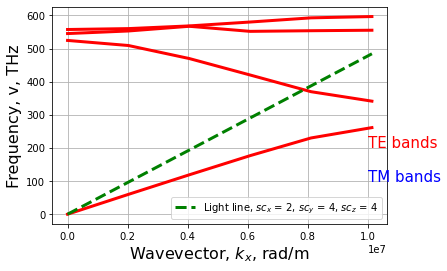

lambda1(m)= 1.147531266670618e-06 lambda2(m)= 8.791108992042137e-07
v1(THz)= 261.430785123967 v2(THz)= 341.2538739669422
lambda_0(m)= 1.0133210829374157e-06


In [8]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt
import math as mt

# simfileName ='freqs_1.dat'
# fileNameNorm_disp = 'dispersion_relations_1.dat'
# fileNameNorm_w = 'Omega.dat'

# ex_str_d =f'grep zevenyoddfreqs: {simfileName}  | cut -d , -f3,7-| sed 1d> {fileNameNorm_disp}'
# ex_str_w =f'grep zevenyoddfreqs: {simfileName}  | cut -d , -f7-| sed 1d> {fileNameNorm_w}'

# call(ex_str_d, shell="True")
# call(ex_str_w, shell="True")

a0 = 1e-6          # default lattice constant defined in MPB
wl = 0.880e-6       # wavelength of light (in micrometer) for 4_F_3/2 - 4_I_9/2 transition
a = 0.352*wl     # nonperturbed lattice constant of the PC (in micrometer)
c = 3e8           
g = 2*np.pi/a

# ------------------------------------------------------------------------------------------------------------------------------------

# te-frequency
fig, ax = plt.subplots()
f = np.genfromtxt("modes_te_norm_8_9_22_2.dat", delimiter=",")
kx = f[:,0]*g
freqs = f[:,1:]*g*c/(2*np.pi*1e12) # frequency in THz 
lightL = c*kx/(2*np.pi*1e12) # frequency in THz
ax.plot(kx,freqs,'r-', linewidth = 3, linestyle = '-')
ax.plot(kx,lightL,'g-', linewidth = 3, linestyle = '--', label='Light line, $sc_x$ = 2, $sc_y$ = 4, $sc_z$ = 4')

plt.xlabel("Wavevector, $k_x$, rad/m", size=16)
plt.ylabel("Frequency, v, THz", size=16)
# plt.axis([0,0.5,0,0.4])
# plt.xticks([t for t in np.arange(0,0.6,0.1)])
# plt.yticks([t for t in np.arange(0,0.5,0.1)])
ax.text(1e7, 200, 'TE bands', color='red', size=15)
ax.text(1e7, 100, 'TM bands', color='blue', size=15)
ax.grid(True)
plt.legend()
plt.show()

# print(freqs/(g*c/(2*np.pi*1e12)))

w1=0.269936*g*c
w2=0.352356*g*c
lambda1 = 2*np.pi*c/w1
lambda2 = 2*np.pi*c/w2
v1=w1/(2*np.pi*1e12) 
v2=w2/(2*np.pi*1e12)

print("lambda1(m)=",lambda1, "lambda2(m)=",lambda2)
print("v1(THz)=",v1, "v2(THz)=",v2)
print("lambda_0(m)=",lambda2 + (lambda1-lambda2)/2)

In [5]:
! grep zoddfreqs: Output_band_diag_mbp-norm_8_3.txt |cut -d , -f3,7- |sed 1d > modes_tm_norm_8_3.dat

In [6]:
! grep zevenfreqs: Output_band_diag_mbp-norm_8_3.txt |cut -d , -f3,7- |sed 1d > modes_te_norm_8_3.dat

In [8]:
! grep zevenyoddfreqs: Output_band_diagram_norm-rect_5_1_16.txt |cut -d , -f3,7- |sed 1d > modes_te_norm_5_1_16d.dat

In [3]:
! grep zevenyevenfreqs: Output_band_diagram_norm-rect_5_1_16.txt |cut -d , -f3,7- |sed 1d > modes_te_norm_5_1_16a.dat

In [4]:
! grep zoddyevenfreqs: Output_band_diagram_norm-rect_5_1_16.txt |cut -d , -f3,7- |sed 1d > modes_te_norm_5_1_16b.dat

In [5]:
! grep zoddyoddfreqs: Output_band_diagram_norm-rect_5_1_16.txt |cut -d , -f3,7- |sed 1d > modes_te_norm_5_1_16c.dat

In [16]:
! grep teyoddfreqs: Output_band_diagram_norm-rect_5_1_16_1.txt |cut -d , -f3,7- |sed 1d > modes_te_norm_5_1_16d_1.dat

In [106]:
! grep tmfreqs: Output_band_diagram_norm_2_3.txt |cut -d , -f3,7- |sed 1d > modes_tm_norm_2_3.dat

In [30]:
! grep tefreqs: Output_band_diagram_norm_5_1_18.txt |cut -d , -f3,7- |sed 1d > modes_te_norm_5_1_18.dat

In [2]:
! mpirun -np 16 python phcr-cavity_band_diag_mpb-norm.py -defect false > Output_band_diag_mbp-norm_8_3.txt

In [ ]:
! mpirun -np 16 python phcr-cavity_band_diag_mpb-norm-inverted.py -defect false > Output_band_diagram_norm-inv_6_2.txt

In [ ]:
! mpirun -np 16 python phcr-cavity_sim.py -defect true -r false -pixavg true > Output-defect-ph-cav-flux-pixel-avg.txt

In [ ]:
! mpirun -np 16 python phcr-cavity_sim.py -defect true -r true -pixavg true > Output-defect-ph-cav-Q-factor-pixel-avg.txt

For optional parallel run on several core we use mpi.

We may execute  <b>mpirun -np 6 </b>  routine for running the code with 6 cores:

In [ ]:
! mpirun -np 6 python phcr-cavity.py > Output-Parallel-6.txt

In [ ]:
! mpirun -np 6 python phcr-cavity_sim.py > Output-Parallel-6.txt

# Visualize the simulation results
The results of simulation (electric and magnetic vectors and given times) can be saved in h5 file. To look at them we can use program <b>h5topng</b>

First we visualize the structure for simulation, which is stored in <b>phcr-cavity-eps-000000.00.h5</b> by executing the following command:

In [9]:
! rm Output_band_diagram_norm_5_1_6.txt

rm: cannot remove 'Output_band_diagram_norm_5_1_6.txt': No such file or directory


In [16]:
! rm phcr-cavity_band_diag_mpb-norm-epsilon.h5

In [121]:
! rm dispersion*.dat

In [14]:
! rm phcr*.png

In [103]:
! h5topng -S 6 -y 0:100 phcr-cavity_band_diag_sim_mpb-epsilon.h5

h5topng error: invalid slice of HDF5 data


In [3]:
! h5topng -S 6 -z phcr-cavity_sim-eps-000000.00.h5

In [6]:
! h5topng -S 6 -x 0:50 phcr-cavity_band_diag_mpb-norm-epsilon.h5

h5topng error: invalid slice of HDF5 data


In [62]:
! h5topng -S 6 -y 0:100 phcr-cavity_band_diag_mpb-norm-epsilon.h5

In [13]:
! h5topng -S 6 -z 0:10000 phcr-cavity_band_diag_mpb-norm-epsilon.h5

h5topng error: invalid slice of HDF5 data


The result is <b>phcr-cavity-eps-000000.00.png</b>

The dynamics of the field during simulation can be visualized as an image series combined into a single video.

First we need to make a series of png frames  from h5 file by a following command:
```Bash
! h5topng -t 1:100 -S2 -Zc  dkbluered -a yarg -A phcr-cavity-eps-000000.00.h5 phcr-cavity-hz-slice.h5
```

For normal PC structure, then for a defected PC

In [24]:
! h5topng -t 1:500 -z 70 -S2 -Zc  dkbluered -a yarg -A norm-phcr-cavity_sim-eps-000000.00.h5 norm-phcr-cavity_sim-ey-slice.h5

h5topng error: invalid slice of HDF5 data


In [31]:
! h5topng -t 1:500 -z 70 -S2 -Zc  dkbluered -a yarg -A phcr-cavity-defect_sim-eps-000000.00.h5 phcr-cavity-defect_sim-ey-slice.h5 

h5topng error: invalid slice of HDF5 data


# Let's convert all files into the video file video.mp4 and remove images

In [25]:
! ffmpeg -y  -start_number 01 -i norm-phcr-cavity_sim-ey-slice.t%03d.png -r 10 -pix_fmt yuv420p -c:a libvo_aacenc -vcodec libx264 video-normal-ph-cav.mp4 > video_out-normal-ph-cav.txt

ffmpeg version 4.2.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.5.0 (crosstool-NG 1.24.0.123_1667d2b)
  configuration: --prefix=/home/cloud-user/anaconda3/envs/pmp --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1590573566052/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, image2, from 'norm-phcr-cavity_sim-ey-s

In [32]:
! ffmpeg -y  -start_number 01 -i phcr-cavity-defect_sim-ey-slice.t%03d.png -r 10 -pix_fmt yuv420p -c:a libvo_aacenc -vcodec libx264 video-defect-ph-cav.mp4 > video_out-defect-ph-cav.txt

ffmpeg version 4.2.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.5.0 (crosstool-NG 1.24.0.123_1667d2b)
  configuration: --prefix=/home/cloud-user/anaconda3/envs/pmp --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1590573566052/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, image2, from 'phcr-cavity-defect_sim-ey

In [27]:
from ipywidgets import Video, Image
video = Video.from_file("video-normal-ph-cav.mp4",play=True)
video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x01csmdat\x00\x00\…

In [34]:
from ipywidgets import Video, Image
video = Video.from_file("video-defect-ph-cav.mp4",play=True)
video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x01[\xa4mdat\x00\x…

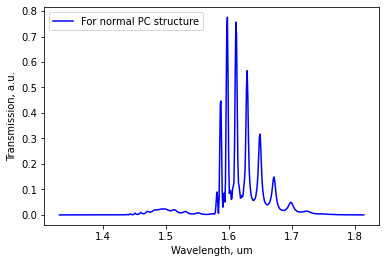

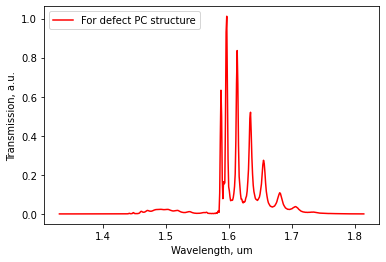

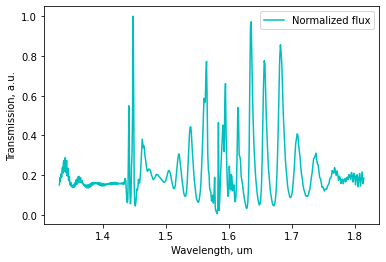

347
499
499
Quality factor of the 1D PC resonator (from the left sideband)= 861.4244791666181


In [4]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt

simfileName_n ='Output-norm-ph-cav-flux-pixel-avg.txt'
fileName_n = 'flux-norm-ph-cav-pixel-avg-wl1536.dat'

simfileName_d ='Output-defect-ph-cav-flux-pixel-avg.txt'
fileName_d = 'flux-defect-ph-cav-pixel-avg-wl1536.dat'

ex_str_n =f'grep flux1: {simfileName_n}  | cut -d , -f2,3- | sed 1d > {fileName_n}'
ex_str_d =f'grep flux1: {simfileName_d}  | cut -d , -f2,3- | sed 1d > {fileName_d}'

call(ex_str_n, shell="True")
call(ex_str_d, shell="True")

f_n = np.genfromtxt(fileName_n, delimiter=",")
f_d = np.genfromtxt(fileName_d, delimiter=",")

#print(f)

#g = np.genfromtxt("flux-nh.dat", delimiter=",")

nzd_f = f_d[:,1]/f_n[:,1] # Normalized flux

fig, ax = plt.subplots()
ax.plot(1/f_n[:,0],f_n[:,1], 'b-', label='For normal PC structure')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(1/f_d[:,0],f_d[:,1], 'r-', label='For defect PC structure')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(1/f_d[:,0],nzd_f/max(nzd_f), 'c-', label='Normalized flux')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
#plt.xlim(left=0.88, right=0.94)
plt.legend()
plt.show()


# Quality factor of the 1D PC resonator


# Search of the flux's global maximum and its cell's number
for i in range(len(nzd_f)):
    if nzd_f[i] == max(nzd_f):
        i = i
        break
    else:
         i = i + 1
print(i) #Cell's number of the flux's global maximum

# Search of the half of the maximum flux and its cell's number (left sideband)
for j in range(len(nzd_f)):
    if nzd_f[j] >= 1*max(nzd_f)/2 and nzd_f[j] <= max(nzd_f)/2:
        j = j
        break
    else:
         j = j + 1
print(j) # Cell's number of the half flux's global maximum (left sideband)

# Search of the half of the maximum flux and its cell's number (right sideband)
for k in range(len(nzd_f)):
    if nzd_f[k] >= 1*max(nzd_f)/2 and nzd_f[k] <= max(nzd_f)/2 and k > i:
        k = k
        break
    else:
         k = k + 1
print(k) # Cell's number of the half flux's global maximum (right sideband)

w_r = f_d[i,0] # Resonance frequency
w_s_l = f_d[i-1,0] # HWHM's left frequency
#w_s_r = f_d[k,0] # HWHM's right frequency
delta_w_ls = 2*(w_r - w_s_l) # FWHM (full width at half maximum) (from lef sideband) 
#delta_w_rs = -2*(w_r - w_s_r) # FWHM (full width at half maximum) (from right sideband)
Q_ls = w_r/delta_w_ls # Quality factor of the 1D PC resonator (from left sideband)
#Q_rs = w_r/delta_w_rs # Quality factor of the 1D PC resonator (from right sideband)

print('Quality factor of the 1D PC resonator (from the left sideband)=', Q_ls) 
#print('Quality factor of the 1D PC resonator (from the right sideband)=', Q_rs)

#print(w_r, w_s_l, delta_w_ls)

In [36]:
1/0.6564744979539793

0.8725552532540507

In [37]:
1/1.096419239354292

0.9120598801138553

In [ ]:
wl = 0.880e-6       # wavelength of light (in micrometer) for 4_F_3/2 - 4_I_9/2 transition
a = 0.352*wl     # nonperturbed lattice constant of the PC (in micrometer)
wB = 0.852*wl
theta = 60        # nanobeam interior angle
H = wB/2*mt.tan(mt.radians(theta)) # high of the 1D PC's beam
c = 3e8           
g = 2*np.pi/a

print(c*g/2/1e12)

In [ ]:
a = 1
b = 2
print(a+b)

In [60]:
0.2/0.11

1.8181818181818183